<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Ecuaciones-Diferenciales-Parciales-2/blob/main/Metodo_de_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metodo de Galerkin

Este es un tipo de método de residuos pesados, donde las funciones de peso

coinciden con las funciones base $β_i$

#Librerias

In [83]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt #Garficar
import scipy.integrate as integrate #para mayor precisión y velocidad

Queremos Resolver la ecuacion

$$-\frac{\partial^2{u}}{\partial{x^2}} + u - x = 0$$

sujeta a las condiciones

$$u(0)=u(1)=0$$

utilizando el método de Galerkin. Use

$$u_3 = \sum_{i=1}^{3} \alpha_i\phi_i(x)$$

con $$\beta_i(x) = sin (i\pi x) $$

 para encontrar las constantes apropiadas $\alpha_i$

#**Explicación del método:**

Paso 1.- **Elección de funciones base:** Seleccionamos funciones matemáticas $\beta_i(x)$ que ya cumplan automáticamente las condiciones de contorno del problema. Por ejemplo, si la solución debe valer 0 en los extremos, elegimos funciones que sean 0 en esos puntos.

Paso 2.- **Forma de la solución aproximada:** Proponemos que la solución aproximada sea una combinación lineal (una suma ponderada)de estas funciones base:
$$ u(x) \approx \alpha_1\beta_1(x) + \alpha_2\beta_2(x)+...+\alpha_N\beta_N(x)$$
donde los $\alpha_i$ son coeficientes desconocidos que debemos determinar.

Paso 3.- **Cálculo del error (residual):** Sustituimos esta solución aproximada en la ecuación original. Como es una aproximación, no satisface exactamente la ecuación, por lo que obtenemos un "error" llamado residual $R(x)$:

$$R(x) = -\frac{\partial^2{u}}{\partial{x^2}} + u - x $$

Paso 4.- **Principio de Galerkin:** Forzamos que este error sea "ortogonal" (en un sentido matemático) a cada una de nuestras funciones base. Esto significa que el producto interno entre el residual y cada función base $\beta_i(x)$ debe ser cero:
$$\int_0^1 R(x)β_j(x) dx = 0$$ para cada $i$
Esta condición minimiza el error en promedio.

Paso 5.- **Sistema de ecuaciones:** Esta condición de ortogonalidad genera un sistema de ecuaciones algebraicas donde las incógnitas son los coeficientes
$\alpha_i$.Cada ecuación corresponde a una función base.

Paso 6.- **Solución del sistema:** Resolvemos este sistema de ecuaciones (usualmente matricial) para encontrar los valores de los coeficientes
$\alpha_i$.

Paso 7.- **Evaluación del error:** Finalmente, calculamos numéricamente cuán buena es nuestra aproximación comparándola con la solución exacta (si se conoce) o estimando el error, evitando cálculos analíticos extensos que consumirían mucho tiempo.

#Paramentros

In [84]:
# Coeficientes α1=a, α2=b, α3=c
x,a,b,c = sp.symbols('x,a,b,c')

#Fuincione Base

In [85]:
# Funciones base: β_i(x) = sin(iπx)
B_1 = sp.sin(sp.pi * x)      # β₁(x) = sin(πx)
B_2 = sp.sin(2 * sp.pi * x)  # β₂(x) = sin(2πx)
B_3 = sp.sin(3 * sp.pi * x)  # β₃(x) = sin(3πx)

# Calculamos la solucion aproximada

In [86]:
# Solución aproximada: u_3(x) = Σ_{i=1}^3 α_i * β_i(x)
u_aprox = a * B_1 + b * B_2 + c * B_3
print("Solución aproximada u_3(x):")
print(f"u_3(x) = {u_aprox}")

Solución aproximada u_3(x):
u_3(x) = a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x)


# Condiciones de contorno

Las funciones base $β_i(x) = sin(iπx)$ satisfacen automáticamente:

$$β_i(0) = sin(0) = 0$$

$$β_i(1) = sin(iπ) = 0$$ para $i$ entero

Por lo tanto, $u_3(0) = u_3(1) = 0$

In [87]:
# u_3(0) = α1*sin(0) + α2*sin(0) + α3*sin(0) = 0
# u_3(1) = α1*sin(π) + α2*sin(2π) + α3*sin(3π) = 0
print("\nVerificamos las condiciones de contorno:")
print(f"u_3(0) = {u_aprox.subs(x, 0)}")
print(f"u_3(1) = {u_aprox.subs(x, 1)}")


Verificamos las condiciones de contorno:
u_3(0) = 0
u_3(1) = 0


# Calculamos el residual

$$**R(x) = -\frac{\partial^2{u}}{\partial{x^2}} + u - x **$$

In [88]:
# Calculamos la segunda derivada de u_3
u_aprox_segunda_derivada = sp.diff(u_aprox, x, 2)

# Residual: R(x) = -u'' + u - x
residual = -u_aprox_segunda_derivada + u_aprox - x
print(f"\nResidual R(x) = -u'' + u - x:")
print(f"R(x) = {sp.simplify(residual)}")


Residual R(x) = -u'' + u - x:
R(x) = a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x) - x + pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))


# Aplicamos el método de Galerkin

En Galerkin, las funciones de peso son las mismas funciones base.

Imponemos la ortogonalidad del residual respecto a cada función base:
$$\int_0^1 R(x)β_j(x) dx = 0$$

# **Aplicando condiciones de Galerkin:**

Ecuación 1: $$\int_0^1 R(x)sin(πx) dx = 0$$

In [89]:
ecua1 = sp.integrate(residual * B_1, (x, 0, 1))
print(f"\nEcuación 1 (j=1): ∫₀¹ R(x)·sin(πx) dx = {sp.simplify(ecua1)}")


Ecuación 1 (j=1): ∫₀¹ R(x)·sin(πx) dx = (pi*a*(1 + pi**2) - 2)/(2*pi)


Ecuación 2: $$\int_0^1 R(x)sin(2πx) dx = 0$$

In [90]:
ecua2 = sp.integrate(residual * B_2, (x, 0, 1))
print(f"Ecuación 2 (j=2): ∫₀¹ R(x)·sin(2πx) dx = {sp.simplify(ecua2)}")

Ecuación 2 (j=2): ∫₀¹ R(x)·sin(2πx) dx = (pi*b*(1 + 4*pi**2) + 1)/(2*pi)


Ecuación 3: $$\int_0^1 R(x)sin(3πx) dx = 0$$

In [91]:
ecua3 = sp.integrate(residual * B_3, (x, 0, 1))
print(f"Ecuación 3 (j=3): ∫₀¹ R(x)·sin(3πx) dx = {sp.simplify(ecua3)}")

Ecuación 3 (j=3): ∫₀¹ R(x)·sin(3πx) dx = (3*pi*c*(1 + 9*pi**2) - 2)/(6*pi)


# Resolvemos los sistemas de ecuaciones para $α_1$, $α_2$, $α_3$

In [92]:
sol = sp.solve([sp.Eq(ecua1, 0), sp.Eq(ecua2, 0), sp.Eq(ecua3, 0)],
                     [a, b, c])
print("\nSolución del sistema para α₁, α₂, α₃:")
for var, val in sol.items():
    print(f"  {var} = {val}")


Solución del sistema para α₁, α₂, α₃:
  a = 2/(pi + pi**3)
  b = -1/(pi + 4*pi**3)
  c = 2/(3*pi + 27*pi**3)


#Construimos la solución aproximada

In [93]:
u_aprox_final = u_aprox.subs(sol)
print(f"\nSolución aproximada final (Galerkin):")
print(f"u_3(x) = {sp.simplify(u_aprox_final)}")

# Convertir a función numérica para evaluación
u_aprox_funcion = sp.lambdify(x, u_aprox_final, "numpy")


Solución aproximada final (Galerkin):
u_3(x) = 2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)


# Solución exacta del problema de contorno

Resolvemos la EDO analíticamente: $$-\frac{\partial^2{u}}{\partial{x^2}} + u - x$$ sujetas a  $$u(0)=u(1)=0$$

In [94]:
u = sp.Function('u')
ecuacion_diferencial = sp.Eq(-sp.diff(u(x), x, 2) + u(x), x)
solucion_exacta = sp.dsolve(ecuacion_diferencial, ics={u(0): 0, u(1): 0})
u_exacta_expr = solucion_exacta.rhs
print(f"\nSolución exacta del problema de contorno:")
print(f"Solución exacta: u(x) = {sp.simplify(u_exacta_expr)}")

# Convertir a función numérica
u_exacta_funcion = sp.lambdify(x, u_exacta_expr, "numpy")


Solución exacta del problema de contorno:
Solución exacta: u(x) = (x*(1 - exp(2))*exp(x) + exp(2*x + 1) - E)*exp(-x)/(1 - exp(2))


# Calculamos el error de aproximación
usando laNorma $L^2$ en $[0,1]$ usando integración numérica ( es más rápida que simbólica)

In [95]:
# Definir función para el error al cuadrado
error_cuadrado_funcion = sp.lambdify(x, (u_exacta_expr - u_aprox_final)**2, "numpy")

# Puntos para integración numérica
puntos_x_integracion = np.linspace(0, 1, 1000)
valores_error_cuadrado = error_cuadrado_funcion(puntos_x_integracion)

# Integración numérica usando la regla del trapecio
error_cuadrado_numerico = np.trapezoid(valores_error_cuadrado, puntos_x_integracion)
error_L2_numerico = np.sqrt(error_cuadrado_numerico)

print(f"Error L² (numérico, regla del trapecio): {error_L2_numerico:.10f}")

# También podemos usar quad de scipy para mayor precisión
error_cuadrado_quad, error_estimado_quad = integrate.quad(
    lambda t: float(error_cuadrado_funcion(t)), 0, 1
)
error_L2_quad = np.sqrt(error_cuadrado_quad)
print(f"Error L² (scipy.integrate.quad): {error_L2_quad:.10f}")
print(f"Error estimado en quad: {error_estimado_quad:.2e}")

# Usaremos el valor más preciso para reportar
error_L2 = error_L2_quad

Error L² (numérico, regla del trapecio): 0.0008441839
Error L² (scipy.integrate.quad): 0.0008441839
Error estimado en quad: 2.63e-10


# Gráfica de comparación


In [96]:
#Puntos para graficar

puntos_x = np.linspace(0, 1, 200)
valores_exactos = u_exacta_funcion(puntos_x)
valores_aproximados = u_aprox_funcion(puntos_x)

#Grafica Soluciones exacta y aproximada

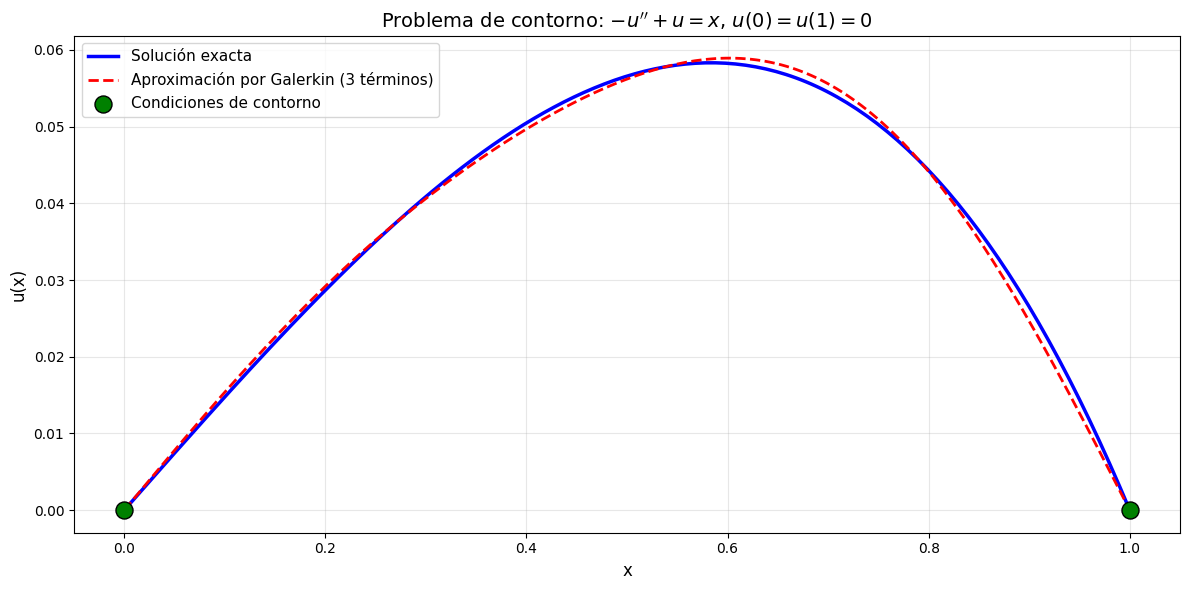

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(puntos_x, valores_exactos, 'b-', label='Solución exacta', linewidth=2.5)
plt.plot(puntos_x, valores_aproximados, 'r--', label='Aproximación por Galerkin (3 términos)', linewidth=2);

# Marcar condiciones de contorno
plt.scatter([0, 1], [0, 0], color='green', s=150, zorder=5,
           marker='o', edgecolors='black', label='Condiciones de contorno')

plt.xlabel('x', fontsize=12)
plt.ylabel('u(x)', fontsize=12)
plt.title('Problema de contorno: $-u\'\' + u = x$, $u(0)=u(1)=0$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()